In [1]:
import pandas as pd

# Load the survey data
data = pd.read_csv('Depression_survey.csv')

# Check the first few rows of the dataset
print(data.head())

             Timestamp   
0  11-12-2024 21:15:26  \
1  11-12-2024 21:15:35   
2  11-12-2024 21:16:22   
3  11-12-2024 21:16:46   
4  11-12-2024 21:17:07   

  Do you feel little interest or pleasure in doing things   
0                                   Most of the time       \
1                                   Most of the time        
2                                   Most of the time        
3                               Nearly all the times        
4                                   Some of the time        

  Trouble falling or staying asleep, or sleeping too much   
0                                   Some of the time       \
1                                   Most of the time        
2                                              Never        
3                                              Never        
4                                   Some of the time        

  Feeling bad about yourself - or that you are a failure or have let yourself or your family down   
0       

In [2]:
# Map textual answers to numerical values
response_map = {
    "Never": 0,
    "Some of the time": 1,
    "Most of the time": 2,
    "Nearly all the times": 3
}

# Apply the mapping to all columns that contain responses
for column in data.columns:
    data[column] = data[column].map(response_map)

# Check the transformed data
print(data)


     Timestamp  Do you feel little interest or pleasure in doing things   
0          NaN                                                  2        \
1          NaN                                                  2         
2          NaN                                                  2         
3          NaN                                                  3         
4          NaN                                                  1         
..         ...                                                ...         
151        NaN                                                  3         
152        NaN                                                  2         
153        NaN                                                  1         
154        NaN                                                  1         
155        NaN                                                  0         

     Trouble falling or staying asleep, or sleeping too much   
0                                  

In [3]:
data = data.drop(data.columns[0], axis=1)

In [4]:
# Assuming a score above a threshold indicates depression
threshold = 15  # Adjust this based on your data analysis

# Calculate total score for each response
data['total_score'] = data.sum(axis=1)

# Create a depression label: 1 for depressed, 0 for not depressed
data['depression_status'] = data['total_score'].apply(lambda x: 1 if x > threshold else 0)

# Check the new data with labels
print(data[['total_score', 'depression_status']])


     total_score  depression_status
0              8                  0
1             19                  1
2             21                  1
3             10                  0
4             12                  0
..           ...                ...
151           10                  0
152           20                  1
153           13                  0
154           24                  1
155            0                  0

[156 rows x 2 columns]


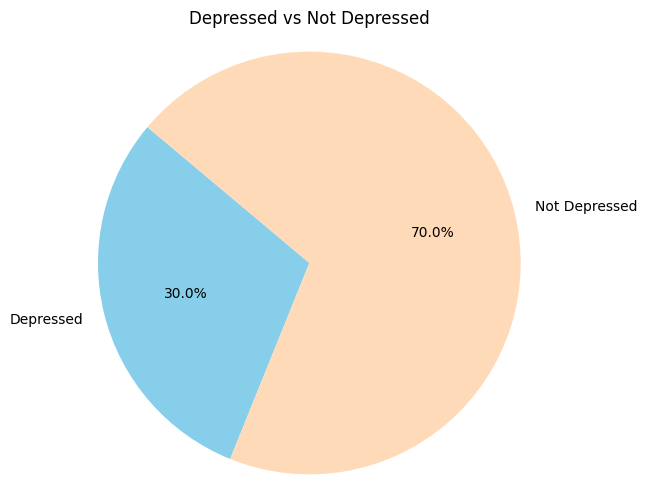

In [27]:
import matplotlib.pyplot as plt

# Sample data (number of people labeled as depressed or not depressed)
labels = ['Depressed', 'Not Depressed']
sizes = [30, 70]  # Example numbers of depressed and not depressed
colors = ['#87CEEB', '#FFDAB9']

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Depressed vs Not Depressed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


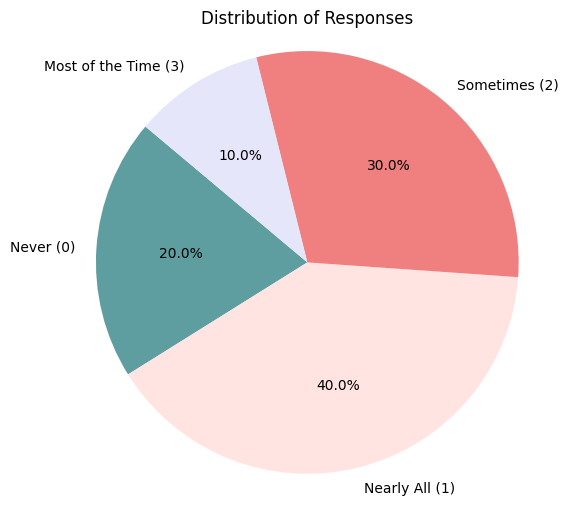

In [34]:
import matplotlib.pyplot as plt

# Sample data: counts of each category (0, 1, 2, 3)
categories = ['Never (0)', 'Nearly All (1)', 'Sometimes (2)', 'Most of the Time (3)']
counts = [20, 40, 30, 10]  # Example counts for each category

# Calculate the percentage for each category
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#5F9EA0',
'#FFE4E1',
'#F08080',
'#E6E6FA',
])
plt.title('Distribution of Responses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [5]:
# Separate features (X) and target (y)
X = data.drop(columns=['depression_status', 'total_score'])  # Features are the survey responses
y = data['depression_status']  # Target is the depression status

# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Create and train the model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predict on the testing set
lr_pred = model_lr.predict(X_test)

# Calculate training accuracy
train_accuracy = model_lr.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate testing accuracy
test_accuracy = model_lr.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

print(classification_report(y_test,lr_pred))


Training Accuracy: 98.39%
Testing Accuracy: 90.62%
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.86      0.75      0.80         8

    accuracy                           0.91        32
   macro avg       0.89      0.85      0.87        32
weighted avg       0.90      0.91      0.90        32



In [9]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

# Calculate training accuracy
train_accuracy =tree_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate testing accuracy
test_accuracy =tree_model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")



Training Accuracy: 100.00%
Testing Accuracy: 71.88%


In [10]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.45      0.62      0.53         8

    accuracy                           0.72        32
   macro avg       0.66      0.69      0.66        32
weighted avg       0.76      0.72      0.73        32



In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

# Calculate training accuracy
train_accuracy =rf_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate testing accuracy
test_accuracy =rf_model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 87.50%


In [12]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.75      0.75      0.75         8

    accuracy                           0.88        32
   macro avg       0.83      0.83      0.83        32
weighted avg       0.88      0.88      0.88        32



In [13]:
from sklearn.svm import SVC

# Create and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

# Calculate training accuracy
train_accuracy =svm_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate testing accuracy
test_accuracy =svm_model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 99.19%
Testing Accuracy: 93.75%


In [14]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.88      0.88      0.88         8

    accuracy                           0.94        32
   macro avg       0.92      0.92      0.92        32
weighted avg       0.94      0.94      0.94        32



In [15]:
from sklearn.naive_bayes import GaussianNB

# Create and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

# Calculate training accuracy
train_accuracy =nb_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate testing accuracy
test_accuracy =nb_model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 97.58%
Testing Accuracy: 93.75%


In [16]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.88      0.88      0.88         8

    accuracy                           0.94        32
   macro avg       0.92      0.92      0.92        32
weighted avg       0.94      0.94      0.94        32



In [19]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=["model","accuracy","precision","f1-score"]
table.add_row(["decision tree","0.72","0.76","0.73"])
table.add_row(["random forest","0.88","0.88","0.88"])
table.add_row(["svm","0.94","0.94","0.94"])
table.add_row(["naive bayes","0.94","0.92","0.94"])
print(table)

+---------------+----------+-----------+----------+
|     model     | accuracy | precision | f1-score |
+---------------+----------+-----------+----------+
| decision tree |   0.72   |    0.76   |   0.73   |
| random forest |   0.88   |    0.88   |   0.88   |
|      svm      |   0.94   |    0.94   |   0.94   |
|  naive bayes  |   0.94   |    0.92   |   0.94   |
+---------------+----------+-----------+----------+


In [17]:
import joblib

# Save the trained model to a file
joblib.dump(nb_model, 'depression_model.pkl')

['depression_model.pkl']

In [18]:
import joblib
import numpy as np

# Step 1: Load the Trained Model
model = joblib.load('depression_model.pkl')  # Ensure you saved the model earlier

# Step 2: Define the Questions
questions = [
    "Do you feel disinterested in things that earlier seemed pleasurable?",
    "Do you have trouble falling or staying asleep, or sleeping too much?",
    "Do you feel bad about yourself or like you have let others down?",
    "Do you move or speak so slowly that others notice, or feel restless?",
    "Do you find it hard to focus on things like reading or watching TV?",
    "Do you feel tired or have little energy?",
    "Do you overeat or have poor appetite?",
    "Do you feel hopeless about the future?",
    "Do you feel easily annoyed or irritable?",
    "Do you feel like life is not worth living?",
]

# Step 3: Collect Responses
print("Answer the following questions:")
print("Options: Never (0), Sometimes (1), Most of the time (2), Nearly all the time (3)")

responses = []
for question in questions:
    while True:  # Ensure valid input
        try:
            print(question)
            answer = int(input("Your answer (0-3): "))
            if answer in [0, 1, 2, 3]:
                responses.append(answer)
                break
            else:
                print("Please enter a valid option (0-3).")
        except ValueError:
            print("Invalid input. Please enter a number between 0 and 3.")

# Step 4: Format Input for Model
input_data = np.array([responses])

# Step 5: Make Prediction
prediction = model.predict(input_data)
depression_score = model.predict_proba(input_data)[0][1]  # Probability of being in class "1" (depressed)

# Step 6: Output the Result
if prediction[0] == 1:
    print(f"\nResult: The person is likely depressed.")
    print(f"Depression Score: {depression_score:.2f}")
else:
    print(f"\nResult: The person is not depressed.")
    print(f"Depression Score: {depression_score:.2f}")


Answer the following questions:
Options: Never (0), Sometimes (1), Most of the time (2), Nearly all the time (3)
Do you feel disinterested in things that earlier seemed pleasurable?
Your answer (0-3): 2
Do you have trouble falling or staying asleep, or sleeping too much?
Your answer (0-3): 2
Do you feel bad about yourself or like you have let others down?
Your answer (0-3): 2
Do you move or speak so slowly that others notice, or feel restless?
Your answer (0-3): 3
Do you find it hard to focus on things like reading or watching TV?
Your answer (0-3): 2
Do you feel tired or have little energy?
Your answer (0-3): 3
Do you overeat or have poor appetite?
Your answer (0-3): 3
Do you feel hopeless about the future?
Your answer (0-3): 2
Do you feel easily annoyed or irritable?
Your answer (0-3): 2
Do you feel like life is not worth living?
Your answer (0-3): 2

Result: The person is likely depressed.
Depression Score: 1.00


C:\Users\Naina Sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Naina Sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
